Objectives:
1. The analysis that we are going to perform shall answer the following questions:
2. How many restaurants in Bangalore take online orders?
3. What percentage of restaurants offer table booking facilities?
4. What was the most common rating received by restaurants?
5. Is there any correlation between the approximated cost for two people and the ratings of a restaurant?
6. The top five cities in Bangalore with the highest and lowest-rated restaurants.
7. Which cuisine do customers like the most?
8. What is the average price for two people, based on the type of service?
9. Does the restaurant’s rating depend on whether it accepts online orders?
10. What are the top 10 highest-rated restaurants?

Step 1: Import the libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_style('darkgrid')

Step 2: Load the dataset

In [2]:
import pandas as pd

df = pd.read_csv('/content/zomato.csv')
print(df.head(), end = '\n')
print(df.shape, end = '\n')
print(df.info(), end = '\n')
print(df.dtypes, end = '\n')

                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5  

Step 3: Understanding the dataset

In [3]:
df.shape

(51717, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
df.dtypes

,0
url,object
address,object
name,object
online_order,object
book_table,object
rate,object
votes,int64
phone,object
location,object
rest_type,object


Step 4: Data Cleaning

(a) Dropping unnecessary columns

Although there are 17 attributes, we will work on only the important ones and remove the remaining columns. Here we only need ‘name’, ‘online order’, ‘book_table’, ‘rate’, ‘votes’, ‘rest_type’, ‘cuisines’, ‘approx_cost(for two people)’, ‘listed_in (type)’, and ‘listed_in(city)’ columns. So, we drop the remaining columns.

In [6]:
df.drop(['url','address','phone','location','dish_liked','reviews_list','menu_item'],axis=1,inplace=True)


(b) Renaming the columns

The columns are then renamed with more descriptive names for easier identification. This is an optional step and can be skipped.

In [7]:
df=df.rename(columns={"name":'Name','rate':'Ratings','votes':'Votes','rest_type':'Rest_Type','cuisines':'Cuisines','approx_cost(for two people)':'Cost','listed_in(type)':'Type','listed_in(city)':'City','online_order':'Takes online orders?','book_table':'Has table booking?'})


In [8]:
df.sample(5)

,Name,Takes online orders?,Has table booking?,Ratings,Votes,Rest_Type,Cuisines,Cost,Type,City
39326,Tree Tops Bar & Kitchen,No,Yes,4.4 /5,130,"Casual Dining, Bar","North Indian, Chinese, Continental, Italian","1,000",Drinks & nightlife,Lavelle Road
11117,Cafe Noir,Yes,No,NaN,0,Casual Dining,"European, French, Salad","1,500",Dine-out,BTM
30464,Punjabi Chulha,Yes,No,3.8 /5,38,Casual Dining,North Indian,500,Delivery,Koramangala 5th Block
47273,24 Carats - The Capitol,No,No,3.1 /5,46,Casual Dining,"Asian, Continental","1,000",Buffet,Residency Road
32843,Popsies,Yes,No,3.9 /5,823,Casual Dining,"Chinese, Momos",750,Delivery,Koramangala 6th Block


(c) Dropping duplicate rows

In [9]:
sum(df.duplicated())

124

Here, we can see that the dataset contains 124 duplicate rows. These rows can sometimes cause a variation in the results and should be taken care of.

In [10]:
df=df.drop_duplicates()

After removing the repeated rows, the shape of the dataframe will be (51593,10).

(d) Cleaning individual rows

(i) First, let’s remove redundant data from the ‘Name’ column. This involves removing punctuation, numbers, special characters, etc., and retaining only alphabets.

In [11]:
def name_clean(text):
    return re.sub(r"[^a-zA-Z0-9 ]", "", text)
df['Name'] = df['Name'].apply(lambda x: name_clean(x))

(ii) Let us now look at the ‘Ratings’ column

In [13]:
df["Ratings"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

(iii) We can see that we have ‘nan,’ ‘NEW,’ and ‘-‘ values that do not have any ratings, and also, the values are strings containing ‘/5’. Let us remove all insignificant data and convert the ratings into numeric values.

In [14]:
## removing 'nan', 'NEW', '-' values
df["Ratings"]=df["Ratings"].replace("NEW", np.nan)
df['Ratings']=df['Ratings'].replace('NaN',np.nan)
df['Ratings']=df['Ratings'].replace('-',np.nan)
df['Ratings']=df['Ratings'].replace('nan',np.nan)

## function to remove '/5'
def remove_5(value: str):
    if type(value)==str:
        value_new=value.split('/')[0]
        return value_new
    return value
df['Ratings']=df['Ratings'].apply(remove_5)

## converting to float type data

df['Ratings']=df['Ratings'].astype(float)

print(df['Ratings'].dtypes)

float64


(iv) Noticing the ‘cost’ attribute, we can observe that they are string values containing commas. Below is the code to convert them into numbers.

In [15]:
## function to remove commas and convert the values
## into numbers
def cost(value):
    value = str(value)
    if "," in value:
        value = float(value.replace(",",""))
        return value
    else:
        return float(value)
df['Cost'] = df['Cost'].apply(cost)
print(df['Cost'].head())

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: Cost, dtype: float64


(v) Handling missing data

In [16]:
print(df.isnull().sum())

print([features for features in df.columns if df[features].isnull().sum()>0])

Name                        0
Takes online orders?        0
Has table booking?          0
Ratings                 10003
Votes                       0
Rest_Type                 227
Cuisines                   45
Cost                      344
Type                        0
City                        0
dtype: int64
['Ratings', 'Rest_Type', 'Cuisines', 'Cost']


<Axes: >

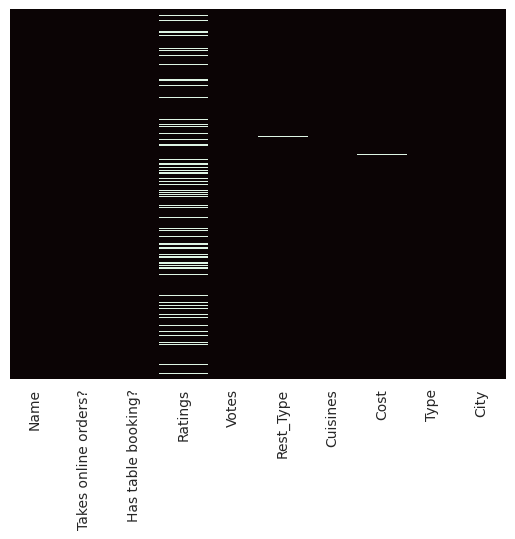

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='mako')


Looking at the above heatmap, we can see a few missing values, particularly in the ‘Ratings’ column. Seeing that now not a good deal of facts is lacking within the other columns, we can drop the corresponding rows.

In [18]:
df=df.dropna()

Step 5: Exploratory Data Analysis
Now that we have cleaned our data, it is ready for analysis.

How many restaurants in Bangalore take online orders?

Takes online orders?
Yes    27046
No     14144
Name: count, dtype: int64


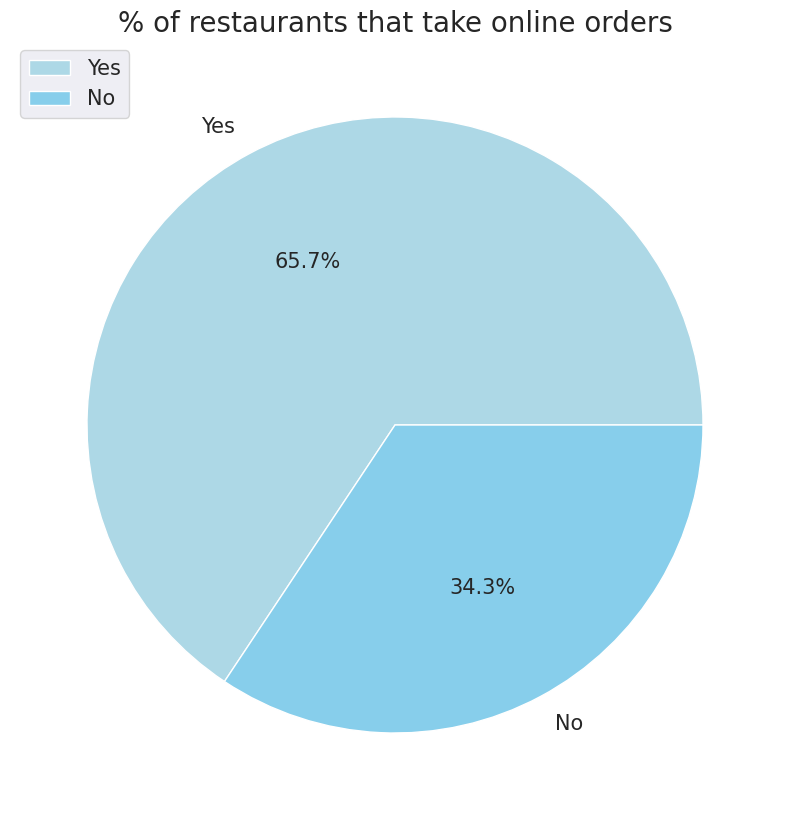

In [19]:
print(df['Takes online orders?'].value_counts())
plt.figure(figsize=(30,10))
df['Takes online orders?'].value_counts().plot(kind='pie',colors=['lightblue','skyblue'],autopct='%1.1f%%', textprops={'fontsize': 15})
plt.title('% of restaurants that take online orders',size=20)
plt.xlabel('',size=15)
plt.ylabel('',size=15)
plt.legend(loc=2, prop={'size': 15})

It is evident from the above graph that in nearly 66% of restaurants, an online ordering facility is available.

What percentage of restaurants offer table booking facilities?

Has table booking?
No     34915
Yes     6275
Name: count, dtype: int64


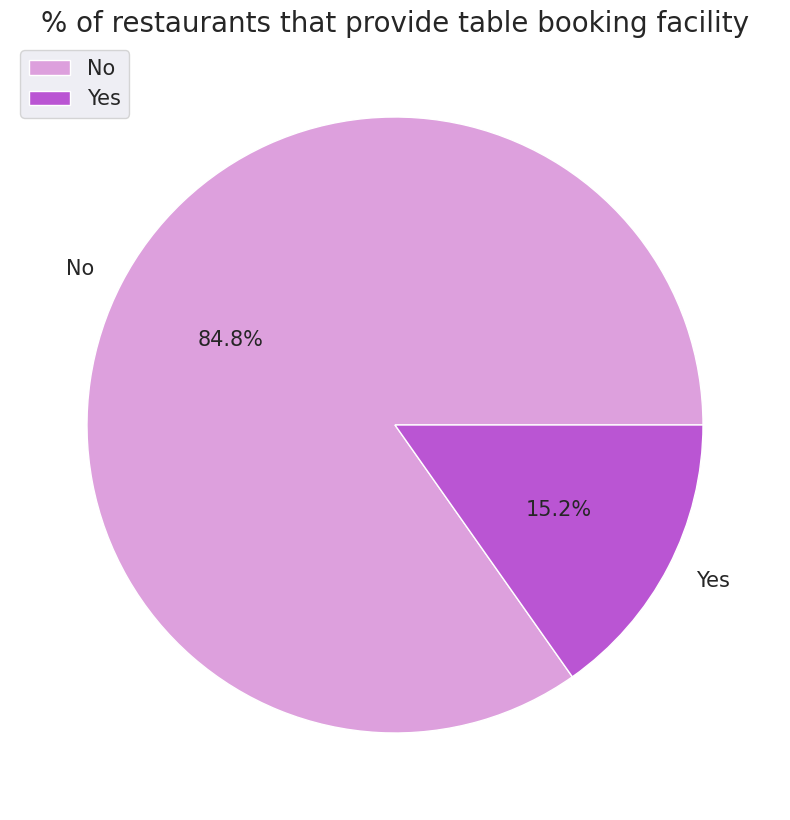

In [20]:
print(df['Has table booking?'].value_counts())
plt.figure(figsize=(30,10))
df['Has table booking?'].value_counts().plot(kind='pie',colors=['plum','mediumorchid'],autopct='%1.1f%%', textprops={'fontsize': 15})
plt.title('% of restaurants that provide table booking facility',size=20)
plt.xlabel('',size=15)
plt.ylabel('',size=15)
plt.legend(loc=2, prop={'size': 15})

The above pie chart shows that approximately 85% of the restaurants in Bangalore do not have a table booking facility through Zomato.

What was the most common rating?

Text(0, 0.5, 'Ratings Count')

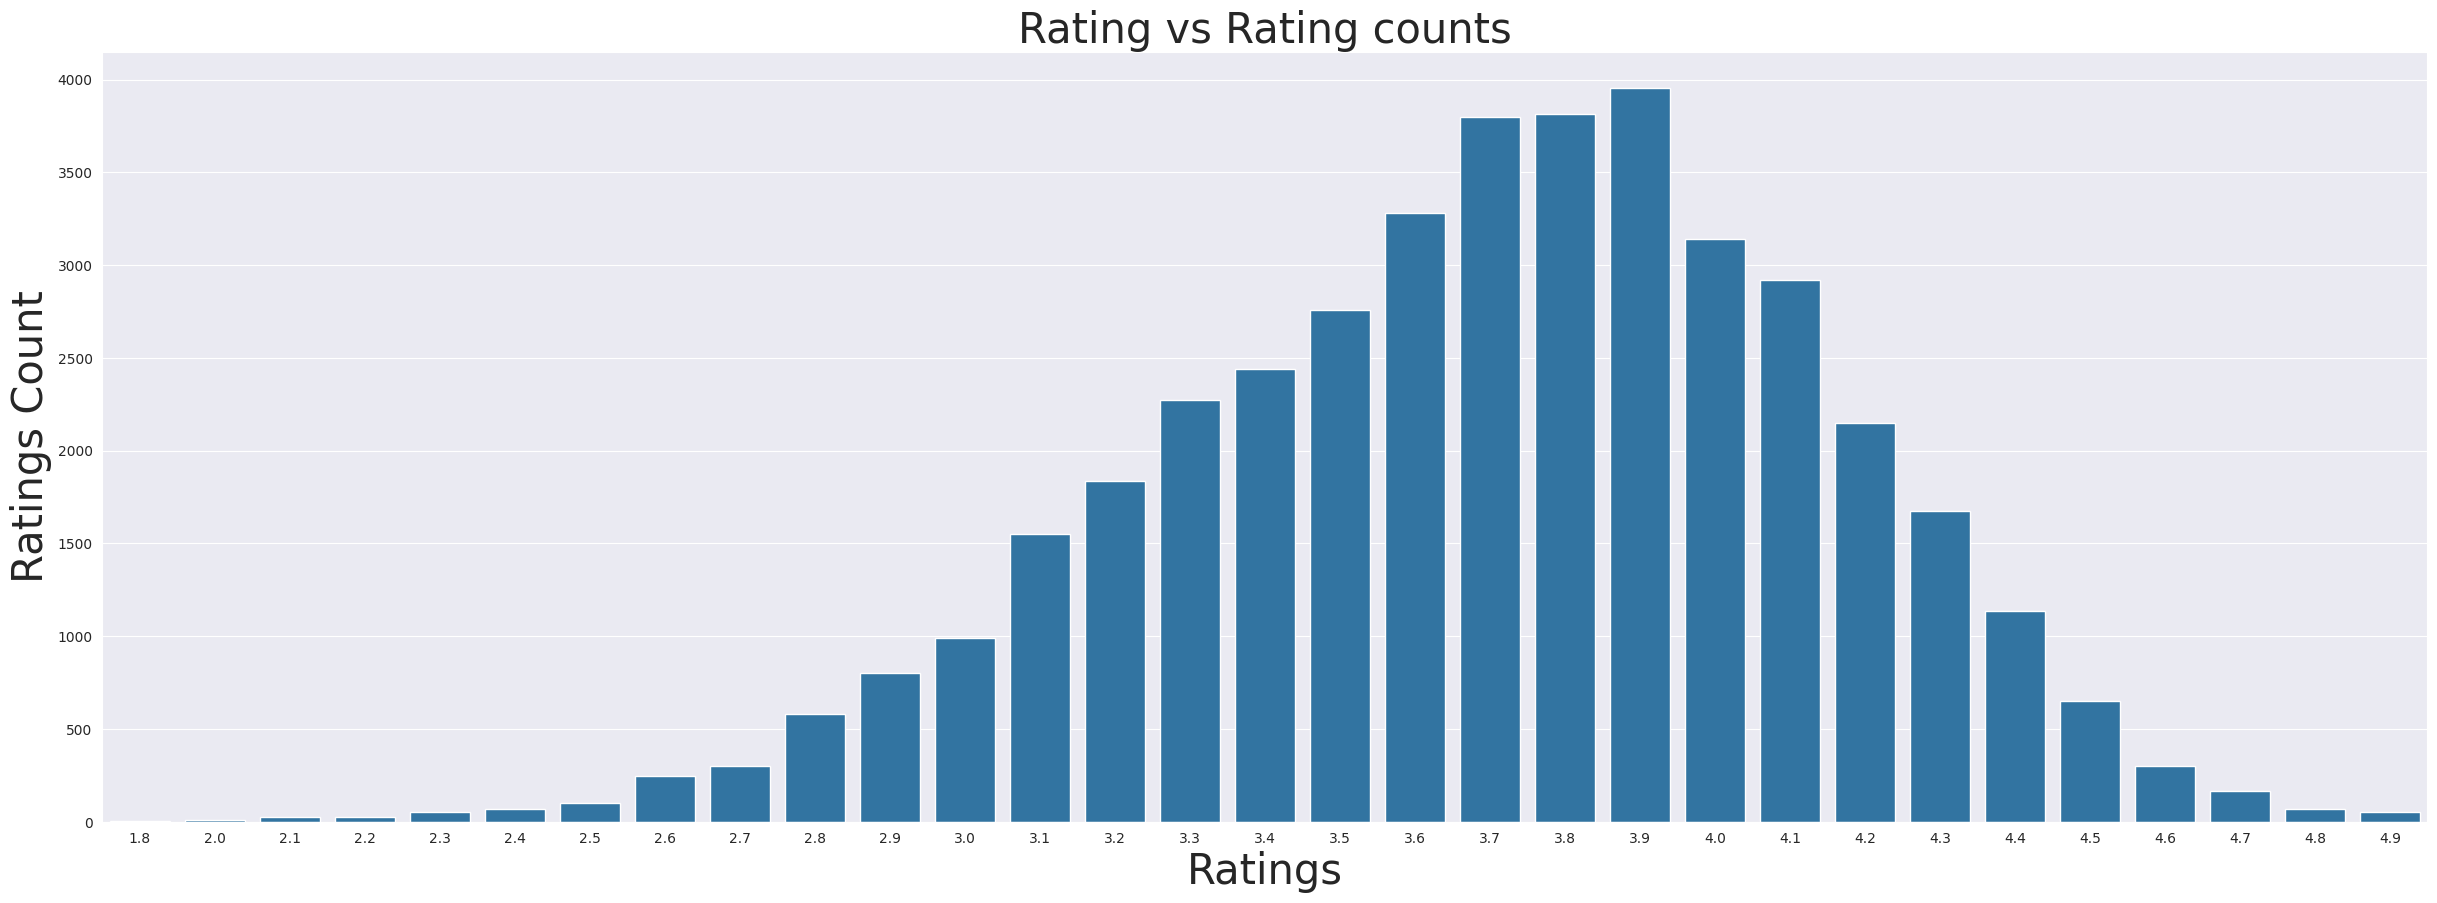

In [21]:
ratings=df.groupby(['Ratings']).size().reset_index().rename(columns={0:"Rating_Count"})
plt.figure(figsize=(30,10))
sns.barplot(x='Ratings',y='Rating_Count',data=ratings)
plt.title('Rating vs Rating counts',size=30)
plt.xlabel('Ratings',size=30)
plt.ylabel('Ratings Count',size=30)

Most of the restaurants in Bangalore received a rating of 3.6 to 4. Very few restaurants have poor ratings, and quite a group of restaurants has excellent ratings of 4.9 or 5.

Is there any correlation between the two people’s approximated cost and a restaurant’s ratings?

/tmp/ipython-input-2916754533.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, -1000.0, '-1,000'),
 Text(0, 0.0, '0'),
 Text(0, 1000.0, '1,000'),
 Text(0, 2000.0, '2,000'),
 Text(0, 3000.0, '3,000'),
 Text(0, 4000.0, '4,000'),
 Text(0, 5000.0, '5,000'),
 Text(0, 6000.0, '6,000'),
 Text(0, 7000.0, '7,000')]

<Figure size 3000x1000 with 0 Axes>

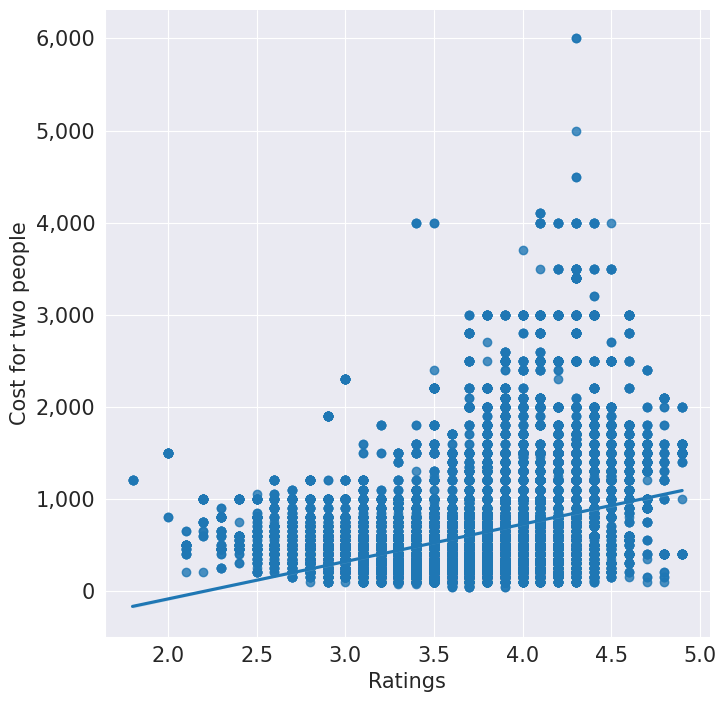

In [22]:
plt.figure(figsize=(30,10))
sns.lmplot(x='Ratings',y='Cost',data=df,height=7)
plt.xlabel('Ratings',size=15)
plt.ylabel('Cost for two people',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

As we can see, restaurants that cost less have better reviews than restaurants that are expensive.

Top 5 cities in Bangalore that have a maximum number of high and low-rated restaurants.

In [23]:
a=df.groupby('City')['Ratings'].mean().reset_index().sort_values(by='Ratings',ascending=False)
print(a.head())

              City   Ratings
7    Church Street  3.801338
5     Brigade Road  3.800742
21         MG Road  3.799536
27  Residency Road  3.778720
20    Lavelle Road  3.774948


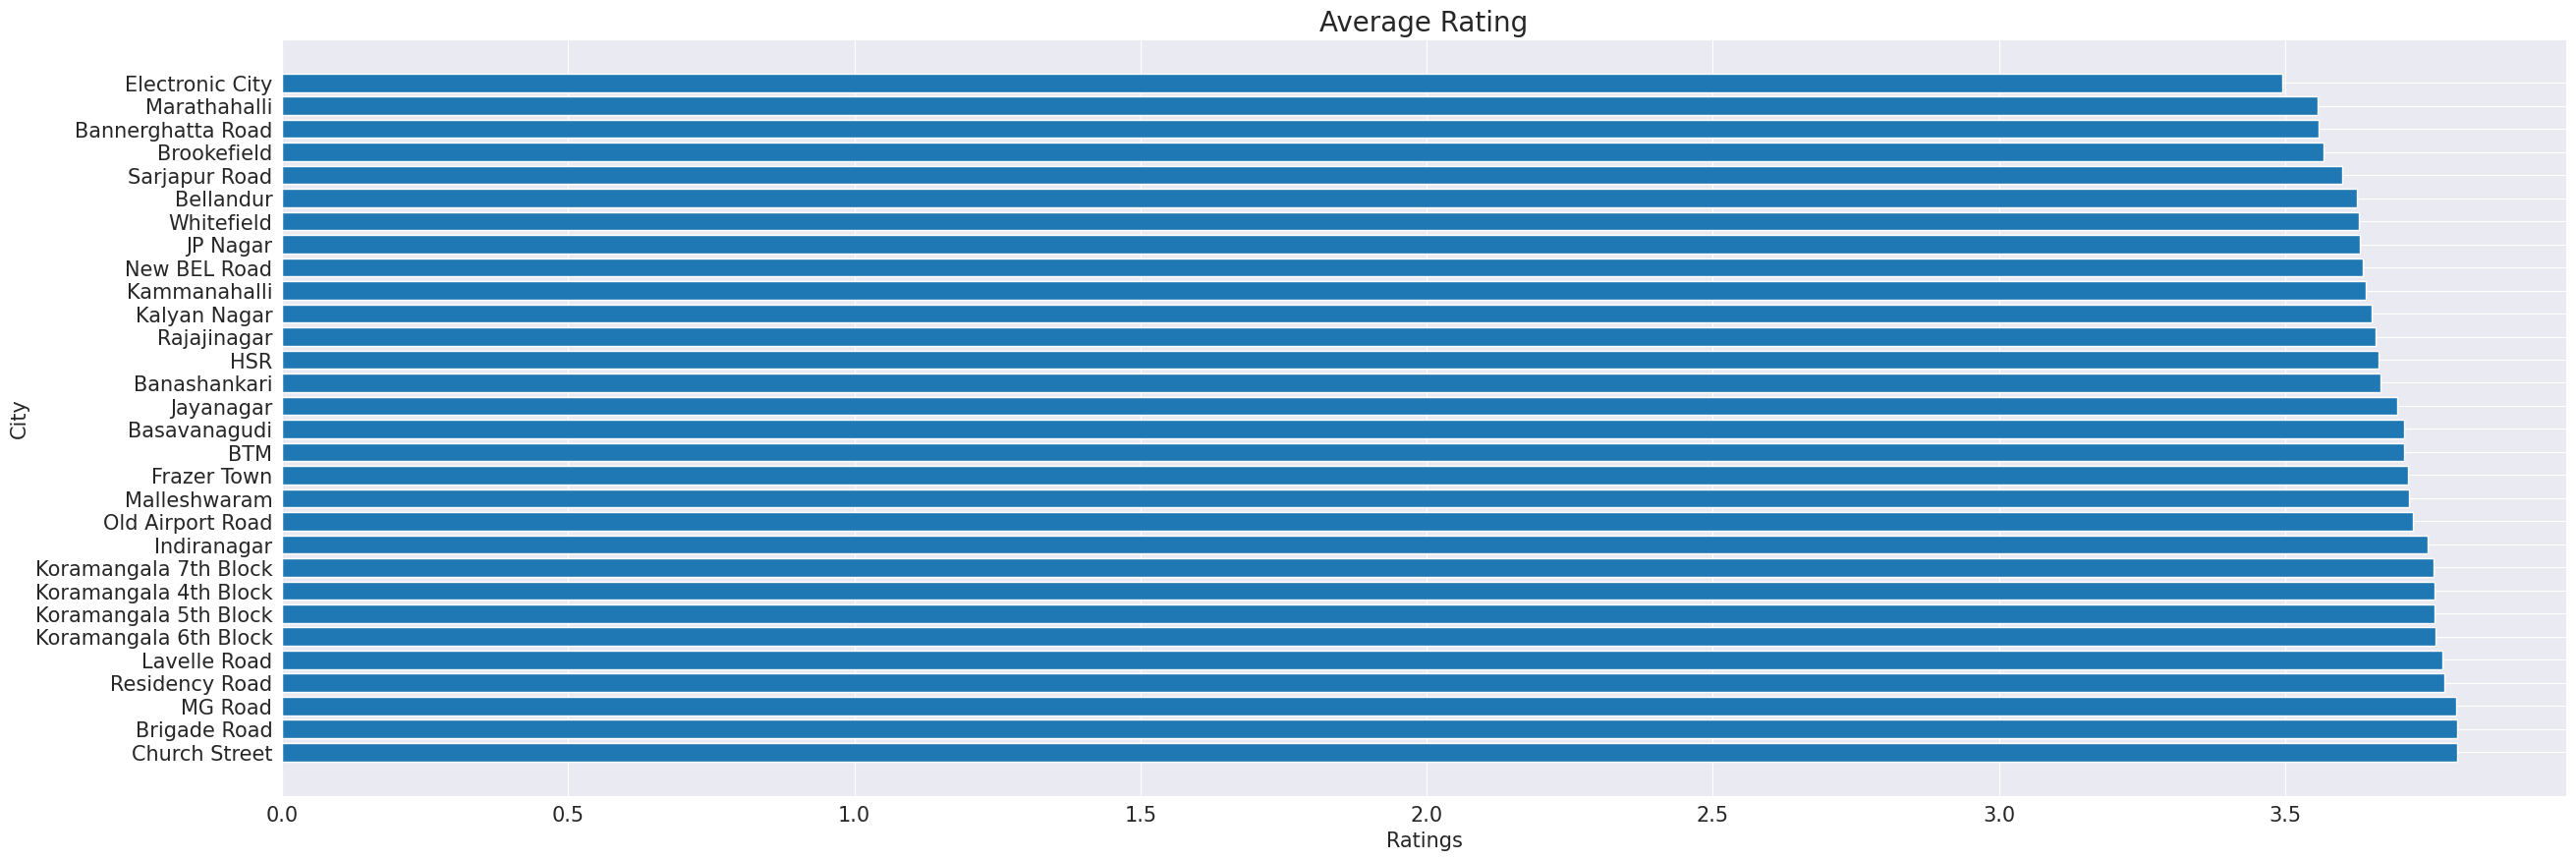

In [24]:
plt.figure(figsize=(30,10))
plt.barh(a.City,a.Ratings)
plt.xlabel('Ratings',size=15)
plt.ylabel('City',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Average Rating',size=20)
plt.show()

High-rated restaurants are most commonly found in Church Street, Brigade Road, and MG Road, while Electronic City has the lowest number of high-rated restaurants.

Which cuisine do customers like the most?
Assuming that customers give desirable ratings to their favorite cuisines, the subsequent evaluation is being done:

In [25]:
b=df.groupby('Cuisines')['Ratings'].mean().reset_index().sort_values(by='Ratings',ascending=False)
print(b.head(5))

                                               Cuisines  Ratings
172                         Asian, Chinese, Thai, Momos      4.9
1274                 Healthy Food, Salad, Mediterranean      4.9
1001  Continental, North Indian, Italian, South Indi...      4.9
989   Continental, North Indian, Chinese, European, ...      4.8
1816         North Indian, European, Mediterranean, BBQ      4.8


Using searching for the above facts, it may be interpreted that Continental, North Indian, and Italian meals are popular among the restaurant customers in Bangalore.

What is the average price for two people based on the type of service?

                 Type         Cost
3            Desserts   409.114064
2            Delivery   495.254631
1               Cafes   646.426208
4            Dine-out   655.081851
0              Buffet  1316.548463
6       Pubs and bars  1336.031746
5  Drinks & nightlife  1454.190751


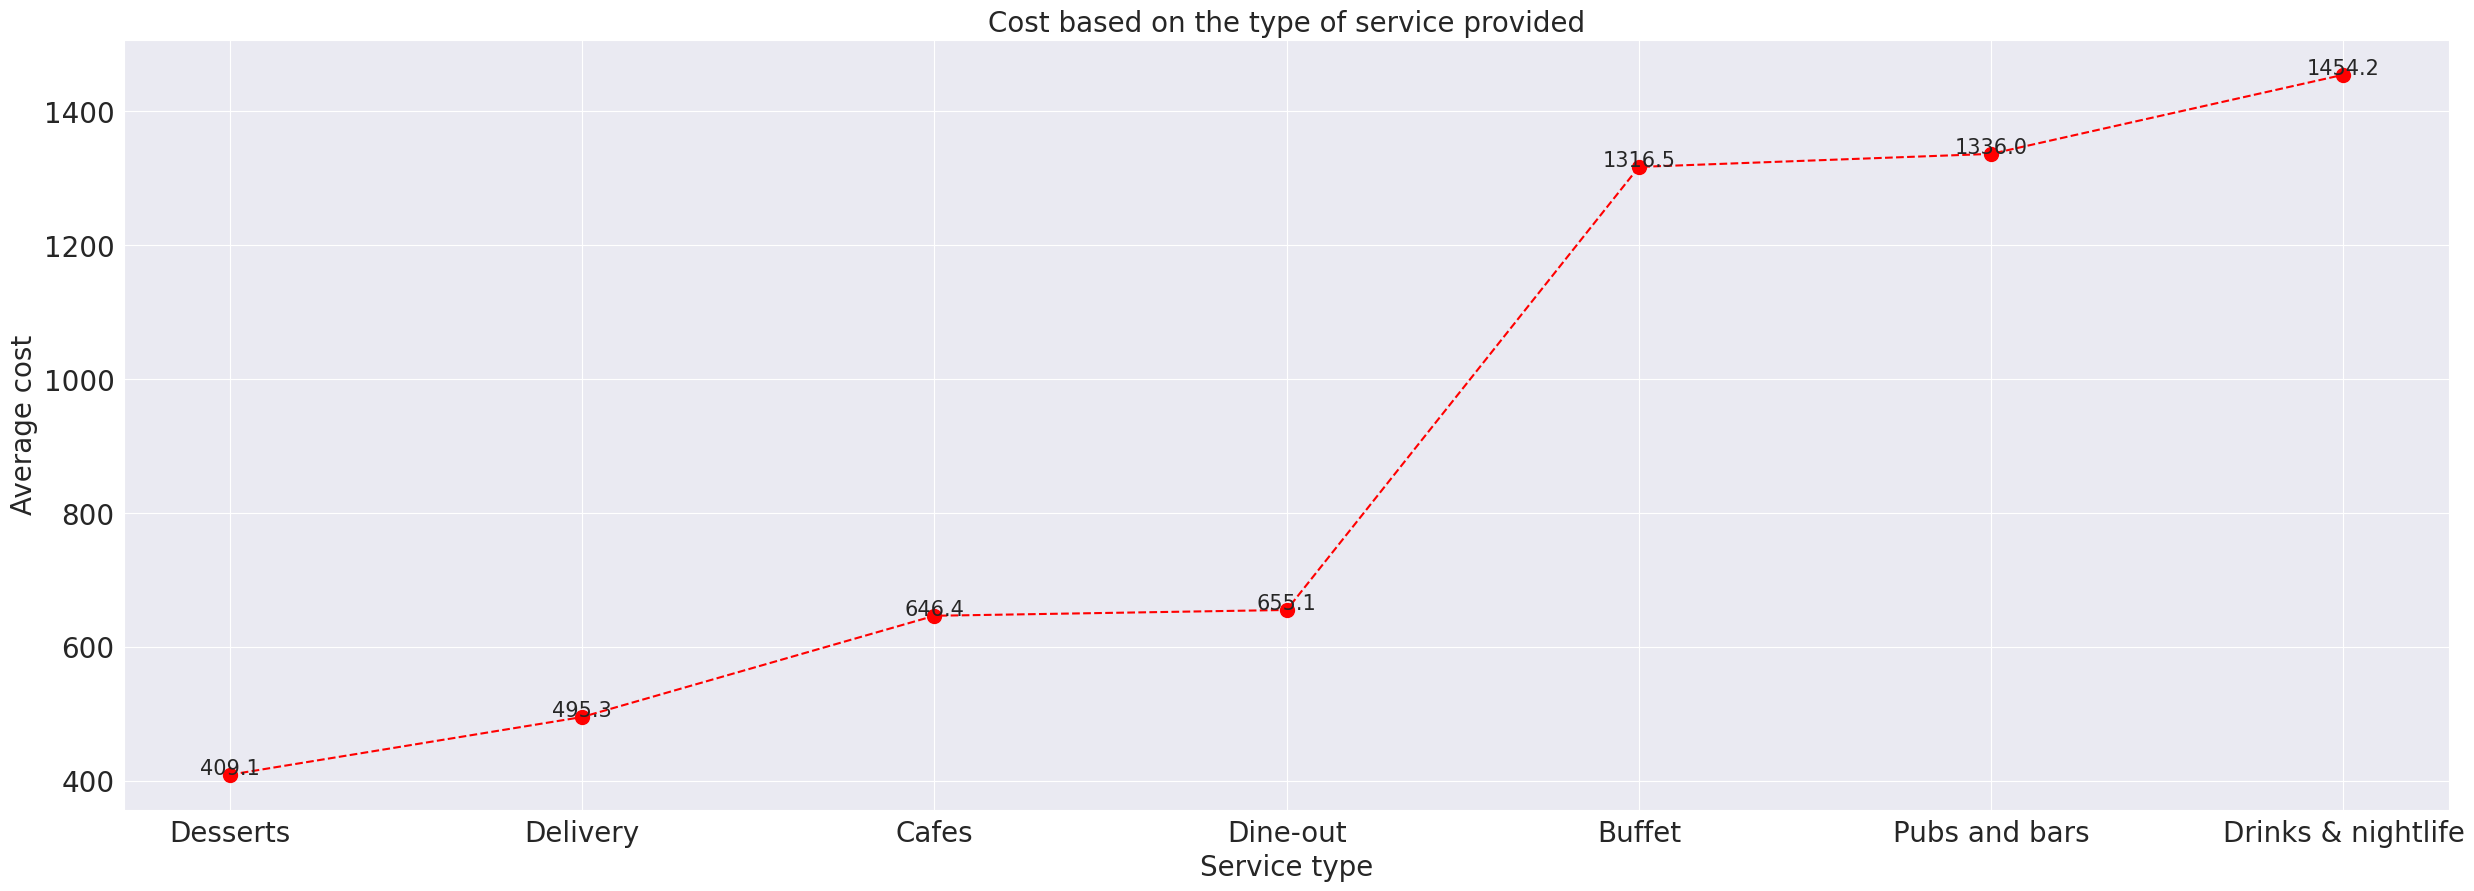

In [26]:
d=df.groupby('Type')['Cost'].mean().reset_index().sort_values(by='Cost')
print(d)
plt.figure(figsize=(30,10))
plt.plot(d['Type'],d['Cost'],'o--r',ms=10)
plt.xlabel('Service type',size=20)
plt.ylabel('Average cost',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Cost based on the type of service provided',size=20)
for i,e in enumerate(d.Cost):
    plt.text(i,e+1,round(e,1),fontsize=15,horizontalalignment='center')
plt.show()

According to the line graph above, while desserts were the least expensive type of food, restaurants that served buffets and drinks cost more than Rs.1300 for two people.

Does the restaurant’s rating depend on whether it accepts online orders or not?

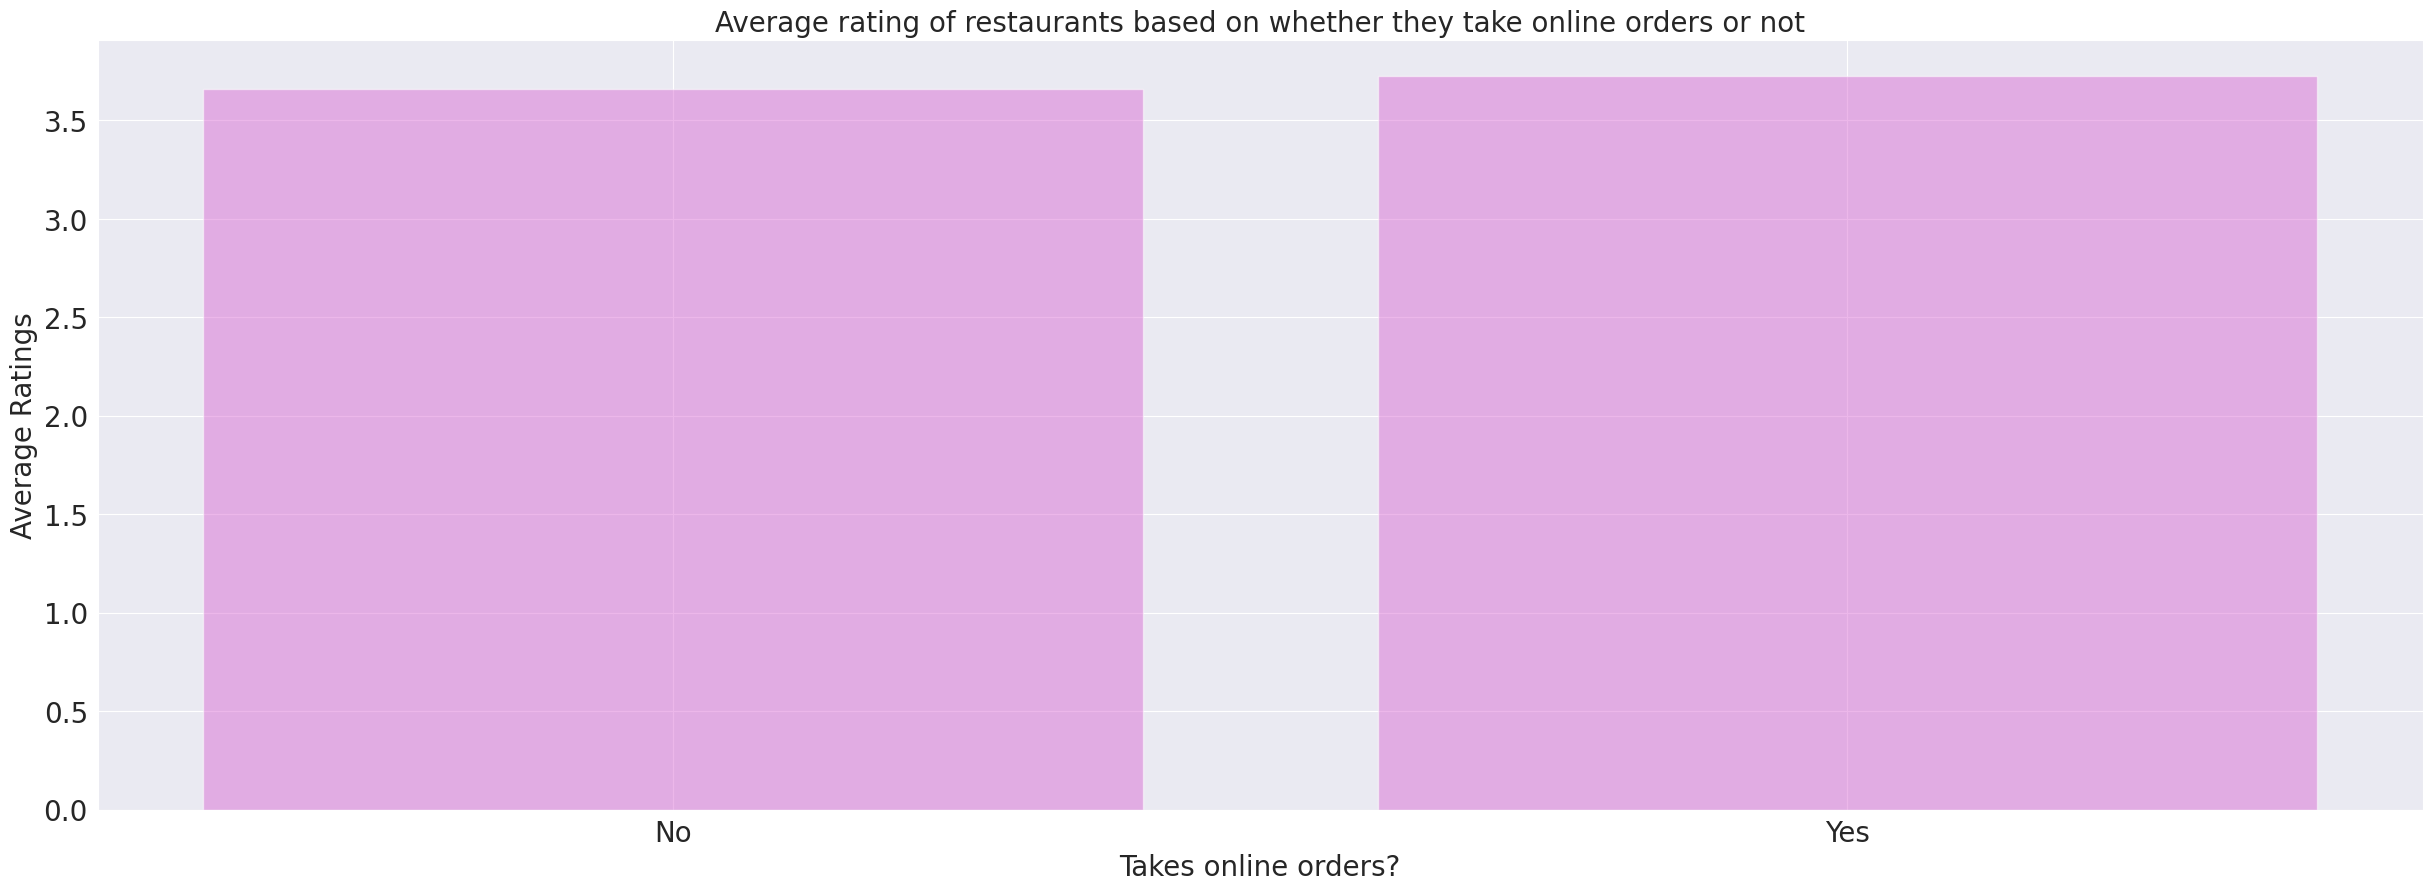

In [27]:
grp1=df.groupby('Takes online orders?')['Ratings'].mean().reset_index()
plt.figure(figsize=(30,10))
plt.bar(grp1['Takes online orders?'],grp1['Ratings'],alpha=0.5,color='orchid')
plt.xlabel('Takes online orders?',size=20)
plt.ylabel('Average Ratings',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Average rating of restaurants based on whether they take online orders or not',size=20)
plt.show()

Restaurants receive almost the same average ratings from customers irrespective of whether they take online orders or not. It can be concluded that a restaurant’s success does not largely depend on the facility of taking online orders.

What are the top 10 highest-rated restaurants?

Often or not, many customers visit a place or choose a place to eat by looking at the restaurant’s ratings. So let us find out the top 10 restaurants that people visit.

In [28]:
grp2=df.groupby('Name')['Ratings'].mean().reset_index().sort_values(by='Ratings',ascending=False)[0:10]
print(grp2)

                                Name   Ratings
943      Byg Brewski Brewing Company  4.900000
420   Asia Kitchen By Mainland China  4.900000
4886                Sant Spa Cuisine  4.900000
4445                    Punjab Grill  4.871429
624           Belgian Waffle Factory  4.844828
1977                        Flechazo  4.800000
5979                The Pizza Bakery  4.800000
4102                 OG Variar  Sons  4.800000
88           ABs  Absolute Barbecues  4.789474
703                       Biergarten  4.766667


These restaurants happen to receive the highest ratings from customers.

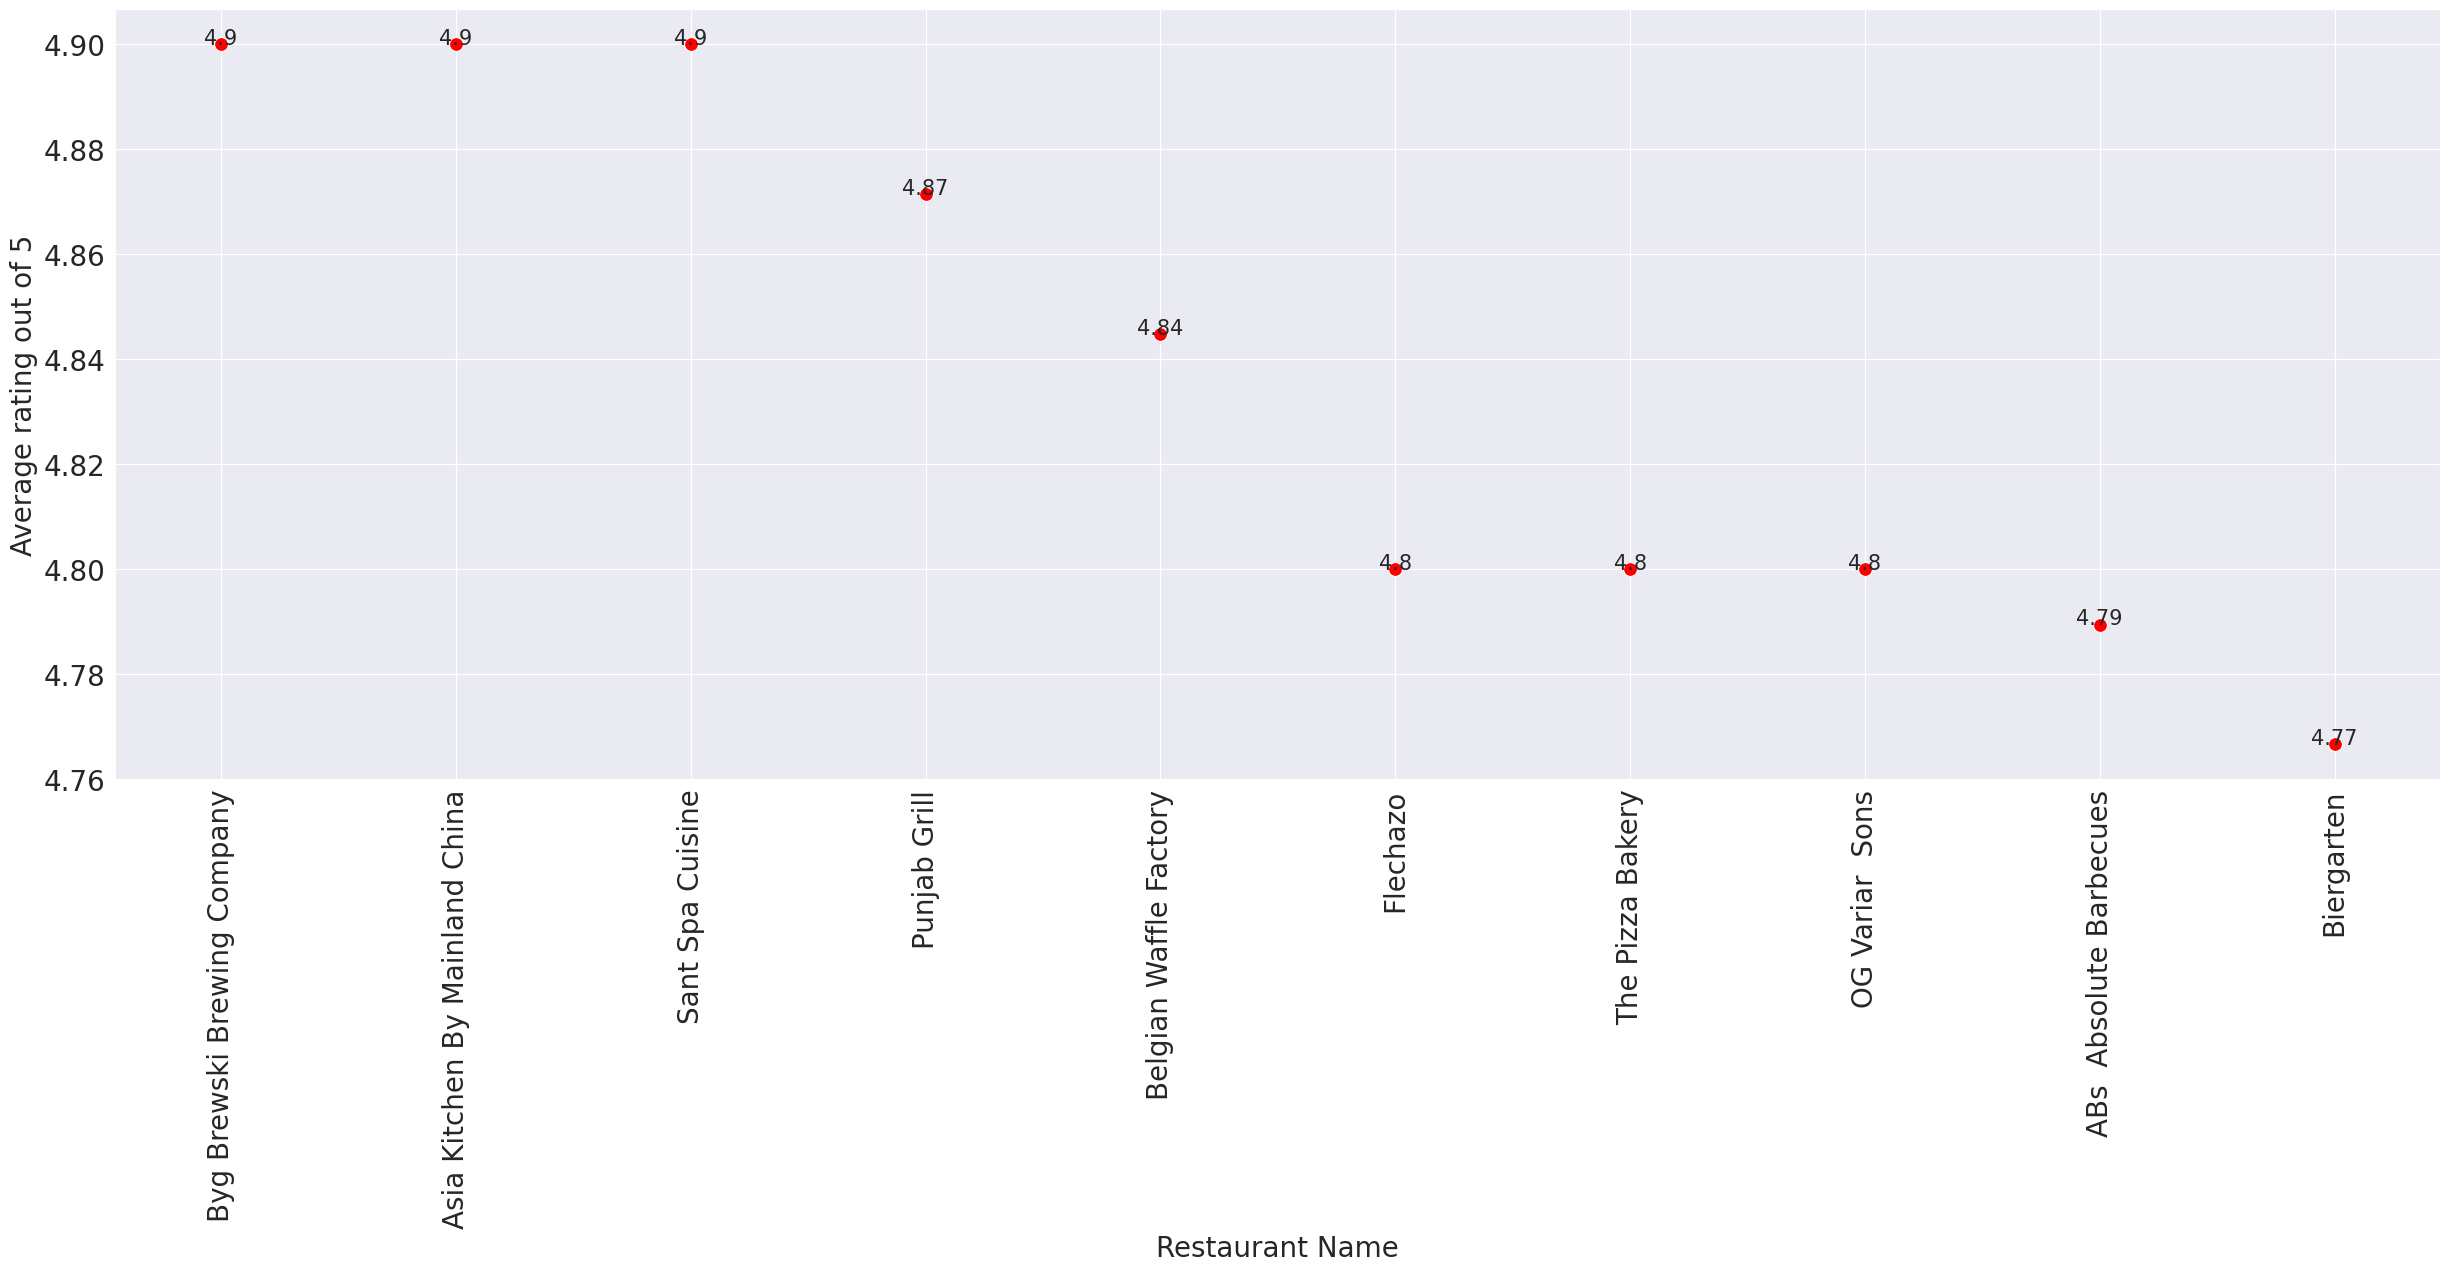

In [31]:
plt.figure(figsize=(30,10))
sns.scatterplot(data=grp2, x='Name', y='Ratings', s=100, color='red')

for i, e in enumerate(grp2.Ratings):
    plt.text(i, e, round(e,2), fontsize=15, horizontalalignment='center')

plt.xlabel('Restaurant Name', size=20)
plt.ylabel('Average rating out of 5', size=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation=90)
plt.show()



Conclusion
Here, we performed exploratory data analysis on the Zomato Bangalore Restaurants dataset and looked into the most influencing factors that led to a restaurant’s successful running in the city. The code provided here can be easily understood and used to implement EDA on other similar datasets.

Key Takeaways:

1. Restaurant ratings are highly influenced by the restaurant’s cuisine, facilities, and pricing.
2. The locality where the restaurant is situated also helps in predicting whether the restaurant will run successfully or not.
3. Places that sell desserts, beverages, and food delivery services tend to be the most popular among the customers.